In [67]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [68]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
train_load = torch.utils.data.DataLoader(train_data, batch_size=4,shuffle=True, num_workers=2)

test_data = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
test_load = torch.utils.data.DataLoader(test_data, batch_size=4,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


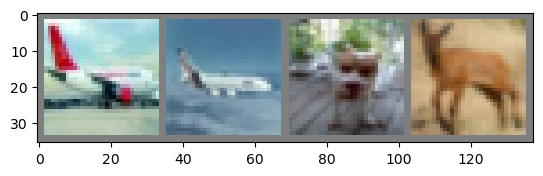

plane plane   dog  deer


In [69]:
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


#random training images
dataiter = iter(train_load)
img, label = next(dataiter)

# img
imshow(torchvision.utils.make_grid(img))
print(' '.join('%5s' % classes[label[j]] for j in range(4)))

In [70]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 128, (2,2),stride=2)
        self.pool1 = nn.MaxPool2d((2,2), stride=2)
        self.bn1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 256, (2,2),stride=2)
        self.pool2 = nn.MaxPool2d((2,2), stride=1)
        self.bn2 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(3 * 3 * 256, 1000) #####
        self.fc2 = nn.Linear(1000,120)
        self.fc3 = nn.Linear(120, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.bn1(self.pool1(torch.tanh(self.conv1(x))))
        x = self.bn2(self.pool2(torch.tanh(self.conv2(x))))
        x = x.view(-1, 3 * 3 * 256)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x


net = Net()

In [71]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.001,momentum = 0.9)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

Net(
  (conv1): Conv2d(3, 128, kernel_size=(2, 2), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=1, padding=0, dilation=1, ceil_mode=False)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2304, out_features=1000, bias=True)
  (bn4): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1000, out_features=120, bias=True)
  (bn5): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
  (bn6): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (softmax): Softmax(dim=1)
)

In [72]:
import matplotlib.pyplot as plt
train_loss = []
validation_loss = []
for epoch in range(15):  

    running_loss = 0.0
    for i, data in enumerate(train_load, 0):
        inputs, label = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:   
            print('[Epoch: %d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    train_loss.append((running_loss*32)/len(train_load))
    
    running_loss = 0.0
    
    with torch.no_grad():
        for data in test_load:
            img, label = data
            img,label = img.to(device),label.to(device)
            outputs = net(img)
            loss = criterion(outputs,label)
            running_loss += loss.item()
    validation_loss.append((running_loss*32)/len(test_load))

[Epoch: 1,  1000] loss: 1.151
[Epoch: 1,  2000] loss: 1.150
[Epoch: 1,  3000] loss: 1.150
[Epoch: 1,  4000] loss: 1.150
[Epoch: 1,  5000] loss: 1.148
[Epoch: 1,  6000] loss: 1.146
[Epoch: 1,  7000] loss: 1.142
[Epoch: 1,  8000] loss: 1.134
[Epoch: 1,  9000] loss: 1.131
[Epoch: 1, 10000] loss: 1.132
[Epoch: 1, 11000] loss: 1.126
[Epoch: 1, 12000] loss: 1.125
[Epoch: 2,  1000] loss: 1.120
[Epoch: 2,  2000] loss: 1.121
[Epoch: 2,  3000] loss: 1.122
[Epoch: 2,  4000] loss: 1.117
[Epoch: 2,  5000] loss: 1.116
[Epoch: 2,  6000] loss: 1.109
[Epoch: 2,  7000] loss: 1.105
[Epoch: 2,  8000] loss: 1.103
[Epoch: 2,  9000] loss: 1.093
[Epoch: 2, 10000] loss: 1.089
[Epoch: 2, 11000] loss: 1.082
[Epoch: 2, 12000] loss: 1.079
[Epoch: 3,  1000] loss: 1.073
[Epoch: 3,  2000] loss: 1.070
[Epoch: 3,  3000] loss: 1.065
[Epoch: 3,  4000] loss: 1.063
[Epoch: 3,  5000] loss: 1.061
[Epoch: 3,  6000] loss: 1.061
[Epoch: 3,  7000] loss: 1.061
[Epoch: 3,  8000] loss: 1.056
[Epoch: 3,  9000] loss: 1.058
[Epoch: 3,

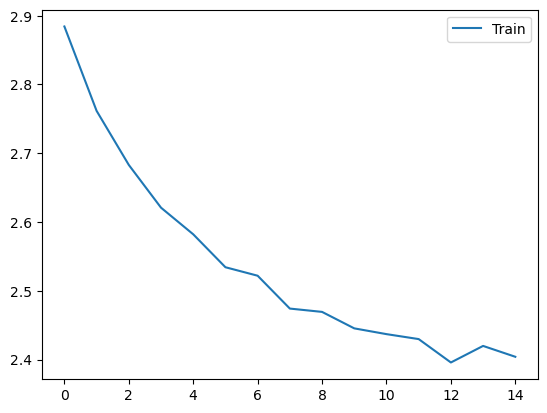

In [73]:
plt.plot(train_loss,label = 'Train')
plt.legend()

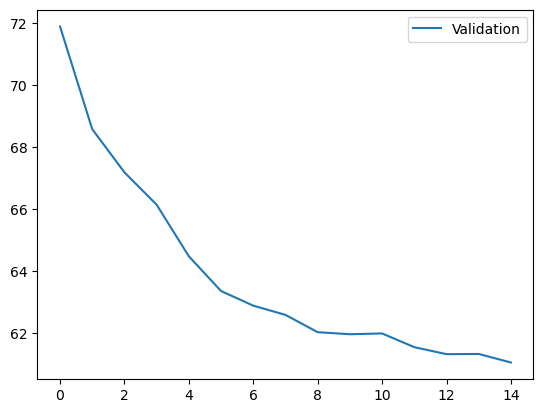

In [74]:
plt.plot(validation_loss,label = 'Validation')
plt.legend()

In [75]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_load:
        img, label = data
        img,label = img.to(device),label.to(device)
        outputs = net(img)
        _, pred = torch.max(outputs.data, 1)
        total += label.size(0)
        correct += (pred == label).sum().item()
print('Finished Training')
print(100 * correct / total)

Finished Training
55.41
